# Computing Lagrangian Descriptors

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise, get_gradient_magnitude, draw_ld_pair

This expressions matches the one in the Overleaf project of the students

In [848]:
def Bohmian_velocity_field(time, u, PARAMETERS=[1,1,1,0]):
    x, y = u.T
    #model parameters
    a, b, omega2, t0 = PARAMETERS
    t = time + t0
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

<span style="color:red">__NOTE__ </span> Statements

* Whenever $\omega_1 / \omega_2$ is _rational_ , then all trajectories are _periodic_ (Why?)

* Whenever $\omega_2$ is _irrational_ , with $\omega_1 = $, then regular and chaotic trajectories coexist (Why?)

* However, when $\omega_1 / \omega_2$ is a _high-order rational_ (e.g., 269/676), trajectories can be quite complicated but still periodic. Numerically, this can be difficult to show if trajectories are not computed accurately enough. So, this can be mistakenly identified as chaotic!



# Regular dynamics

* WAVE EQUATION: Differences in notation

_Students notation_

\begin{equation}
    \Psi = c_{0,0}\psi_{0,0} + a\:c_{1,0}\psi_{1,0} + b\:c_{1,1}\psi_{1,1}
\end{equation}

Setting $\omega_1=1$ and $\omega_2=\frac{1}{c^2}$ for some $c \in \mathbb{R}$, and setting $c_{0,0}= 1, c_{1,0}= \frac{1}{\sqrt{2}}, c_{1,1}= \frac{1}{2}$.

_Notation followed_

\begin{equation}
    \Psi = \psi_{0,0} + C_{1}\psi_{1,0} + C_{2}\psi_{1,1}
\end{equation}

where $C_1 = \frac{a}{\sqrt{2}}$ and $C_2 = \frac{b}{2}$

* ASSAYS
   * __First__, test the effect on the dynamics revealed by LDs, as we add up excited states to the ground state
   * __Second__, test the effect on the dynamics revealed by LDs, as the dynamics changes from regular to chaotic when the ratio of angular frequencies, $\omega_1 / \omega_2$, changes from rational to irrational. 
   * __Third__, LD convergence with integration time $\tau$

## Case: $a, b, \omega_2 = (0, 0, 1)$

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt}=0 \\
    \frac{dy}{dt}=0
\end{aligned}

* Nodal points (where $\Psi(x_N, y_N) = 0$)


## Case: $a, b, \omega_2 = (1, 0, 1)$

### Description

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{\sqrt{2}}\psi_{1,0}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt} &= -\frac{\sin(t)}{1+2x\cos(t)+x^2}\\
    \frac{dy}{dt} &= \; 0
\end{aligned}

* Nodal lines (where $\Psi(x_N, y_N, t_N) = 0$)

\begin{equation*}
(x_N, y_N, t_N) = (\pm 1, y, k \pi) \quad y \in \mathbb{R}; k \in \mathbb{Z}
\end{equation*}

* Lagrangian descriptor (arc length)

\begin{align*}
M^+ &= \int_{t_0}^{\tau} \Big\lVert -\frac{\sin(t)}{1+2x\cos(t)+x^2}\Big\Vert dt\\
M^- &= \int_{-\tau}^{t_0} \Big\lVert -\frac{\sin(t)}{1+2x\cos(t)+x^2} \Big\Vert dt
\end{align*}

### Vector field

In [674]:
x = np.linspace(x_min, x_max, 600)
t = np.linspace(0.0,4*np.pi, 600)

X,T = np.meshgrid(x,t)

In [675]:
#vector field
G = 1 + 2*x*np.cos(T) + X**2
vx = -np.sin(T)/G

vx = ma.masked_where(vx < -3, vx)
vx = ma.masked_where(vx >  10, vx)

CASE 1

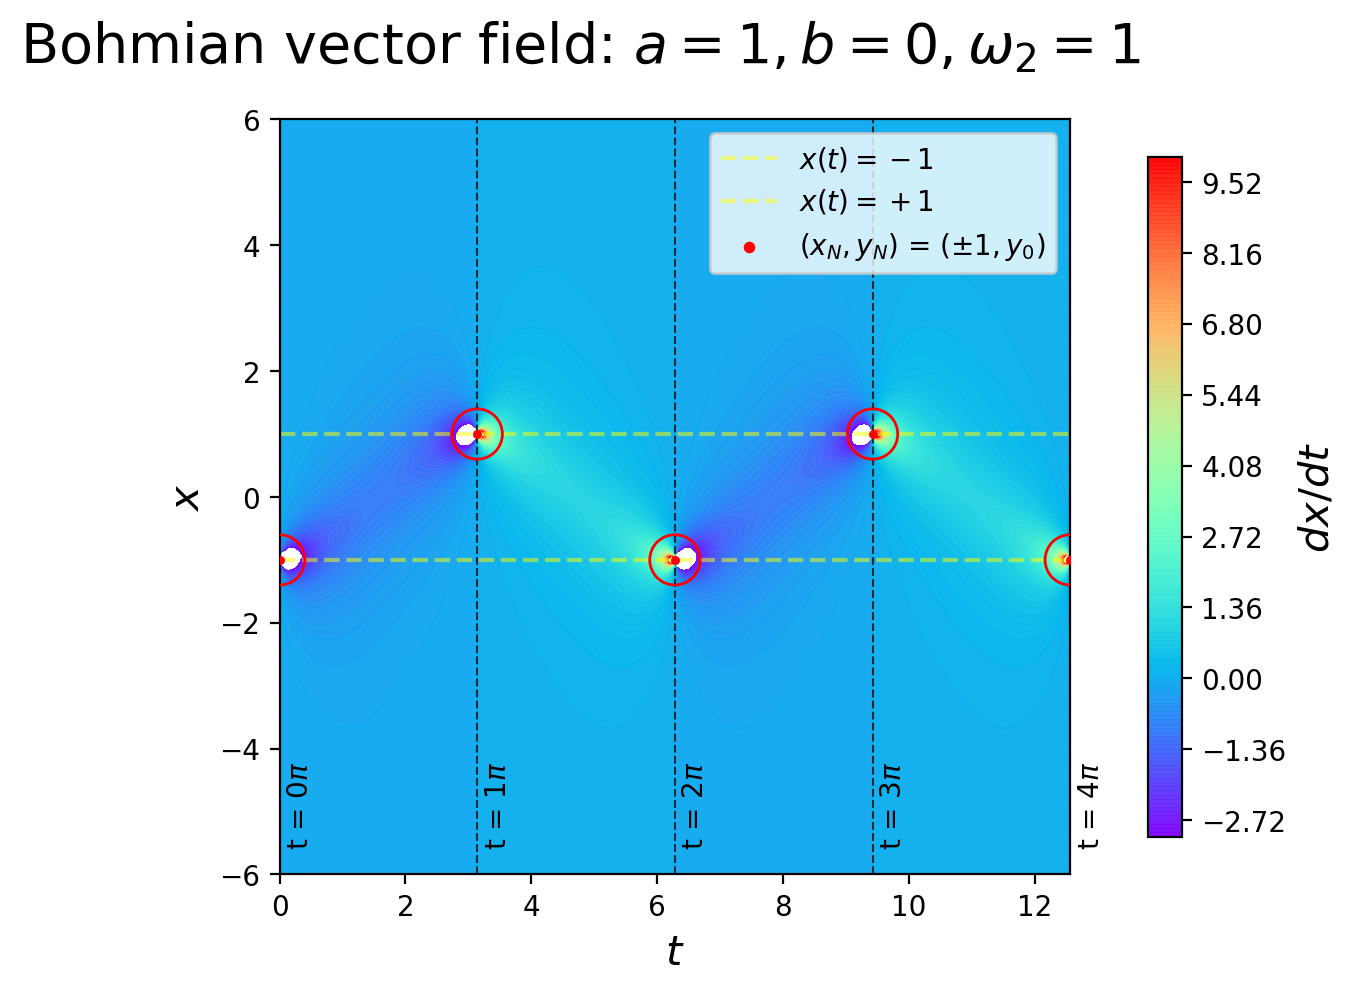

In [773]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines - nodal points
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

ax.scatter([],[],color="red",s=10,label="($x_N, y_N$) = ($\pm 1, y_0$)")
    
##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)

##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

### Vector field and trajectories

#### $t_0 = 0, t_f = 4\pi$

In [831]:
a, b, omega2, t0 = [1, 0, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

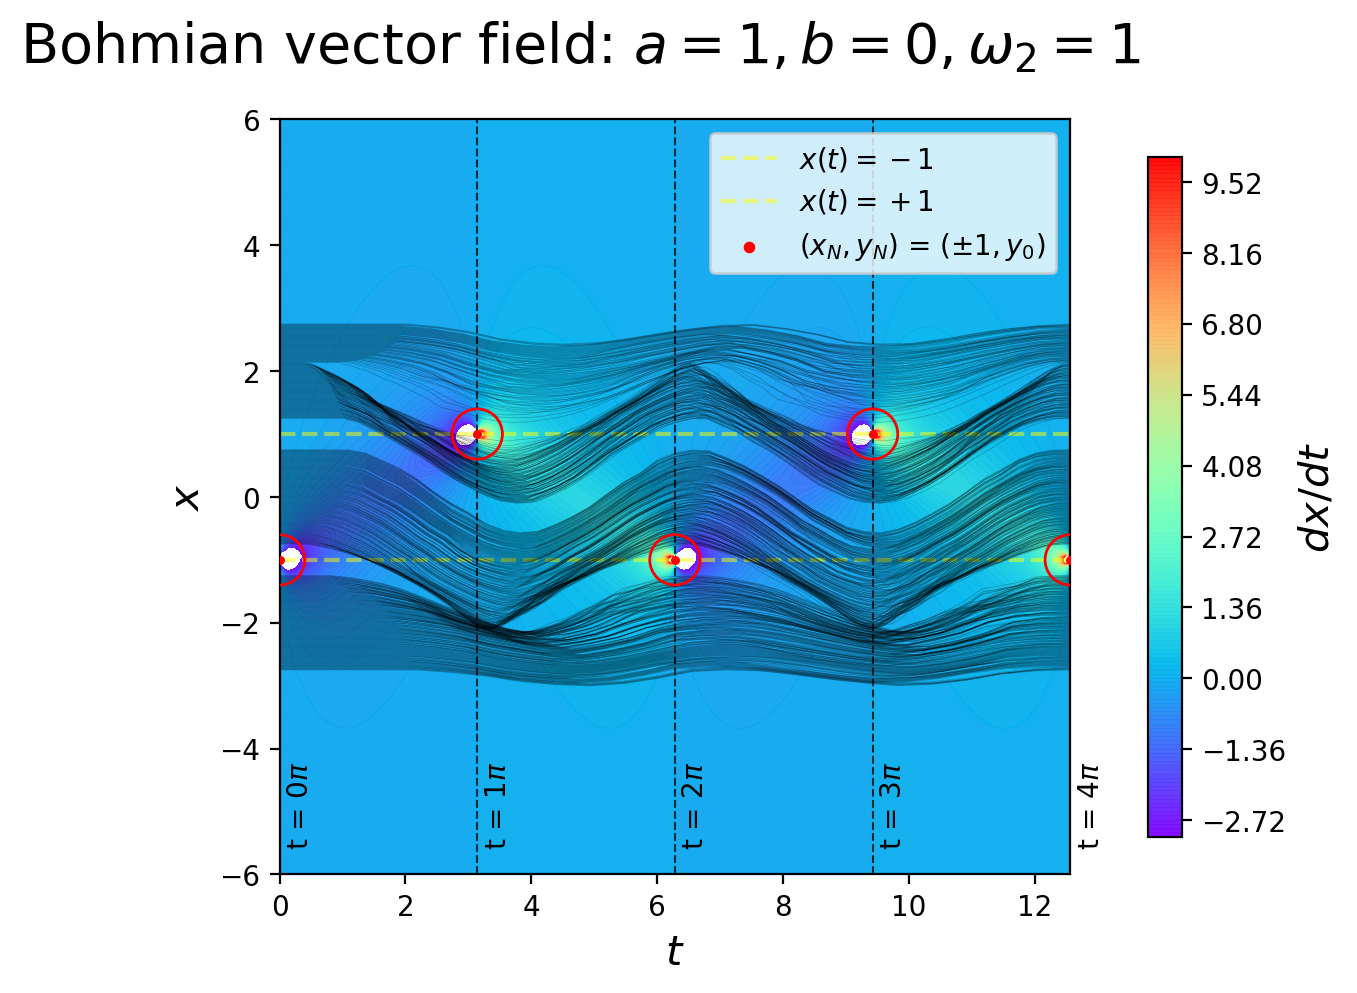

In [832]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)


##############################################
#CONTOUR PLOT
n_levels = 200
cmap = "rainbow"

contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

ax.scatter([],[],color="red",s=10,label="($x_N, y_N$) = ($\pm 1, y_0$)")
##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
    
##############################################
#
# PLOT TRAJECTORIES (Backwards)
#
##############################################
t0, tf = [0, 4*np.pi]
time_span = (t0, tf)
color_traj = 'black'

N_traj = 200

ICs_interval = [1.25, 2.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

ICs_interval = [-0.75, 0.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
ICs_interval = [-2.75, -1.25]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

# TO-DO's

* Correct implementation for all the following assays with the correct initial condition in time and integration intervals

  * $[t_0, t_f = t_0 \pm \tau] = [\pi/2, \pi/2 \pm \pi/2]$

* Make sure that forward and backward trajectories are correctly solved and plotted

* Compute LD maps for all the corresponding cases and verify qualitatively that the behaviour of trajectories matches the information from LDs

#### $t_0 = \pi/2, t_f = \pi$

Forward trajectories

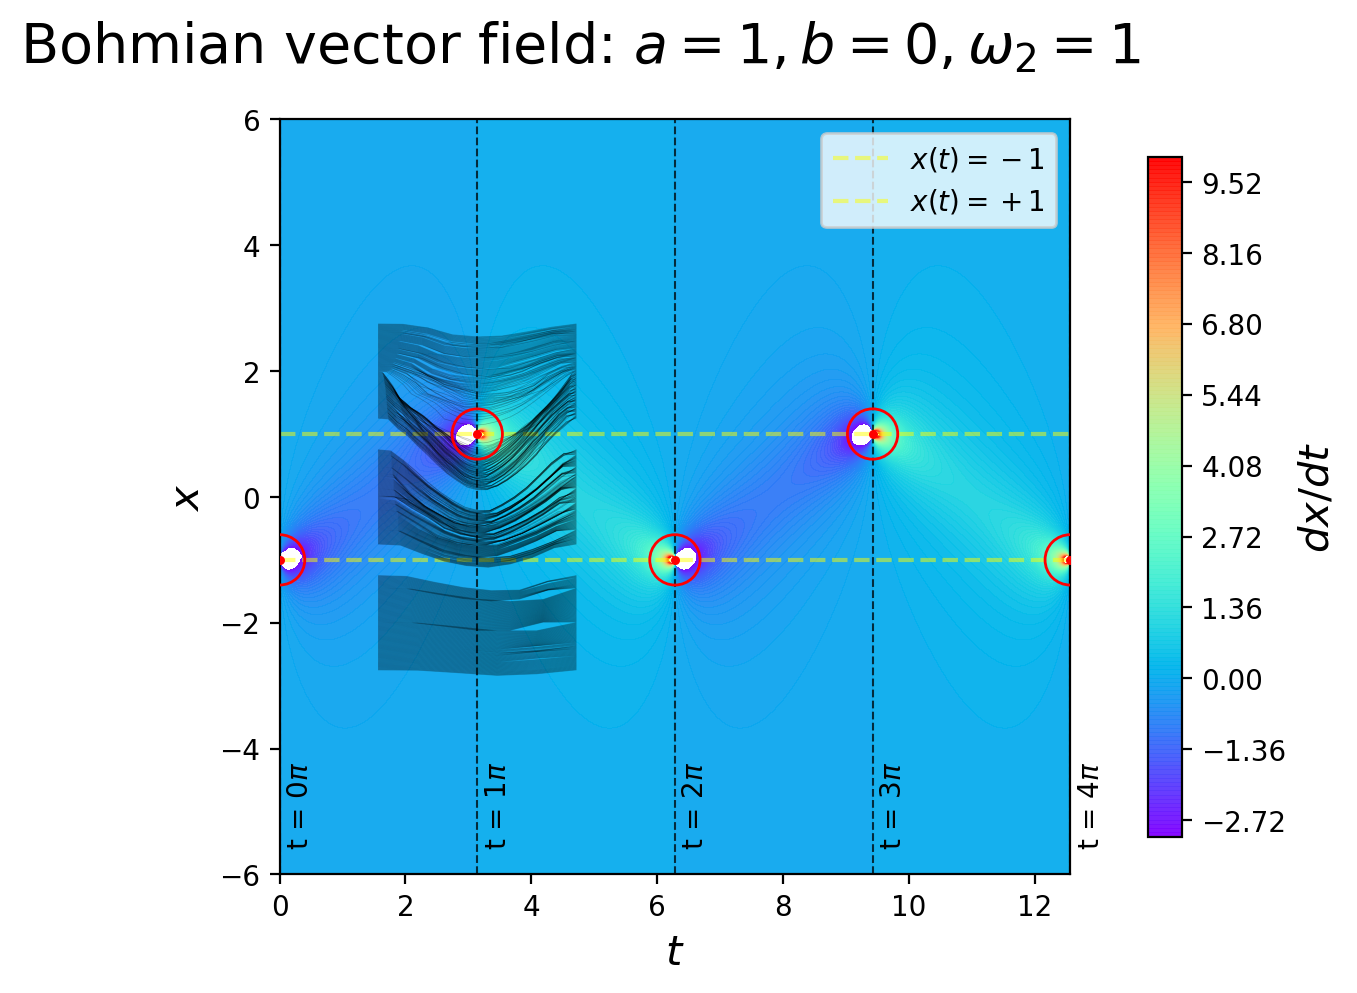

In [851]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines - nodal points
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
    
##############################################
#
# PLOT TRAJECTORIES (Forwards)
#
##############################################
t0, tf = [np.pi/2, 3*np.pi/2]
time_span = (t0, tf)

a, b, omega2 = [1, 0, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

color_traj = 'black'
N_traj = 200

ICs_interval = [1.25, 2.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

ICs_interval = [-0.75, 0.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
ICs_interval = [-2.75, -1.25]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

Backward trajectories

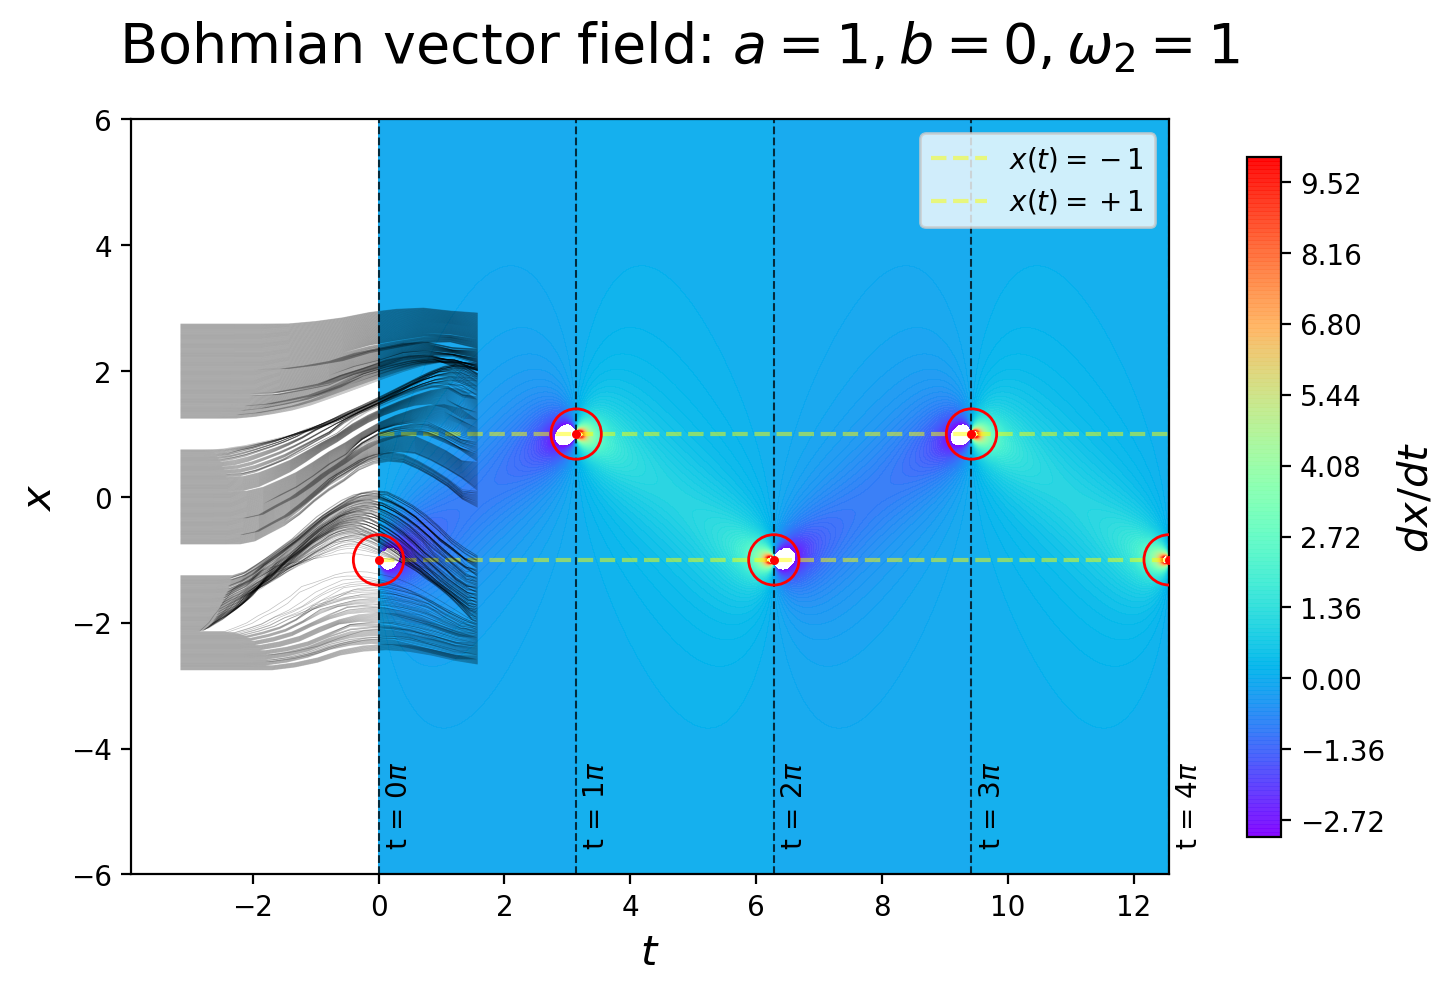

In [868]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines - nodal points
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
    
##############################################
#
# PLOT TRAJECTORIES (Forwards)
#
##############################################
t0, tf = [-np.pi, np.pi/2]
time_span = (t0, tf)

a, b, omega2 = [1, 0, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

color_traj = 'black'
N_traj = 200

ICs_interval = [1.25, 2.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

ICs_interval = [-0.75, 0.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
ICs_interval = [-2.75, -1.25]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

#### $t_0 = \pi, t_f = 3\pi/2$

In [840]:
a, b, omega2, t0 = [1, 0, 1, np.pi]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

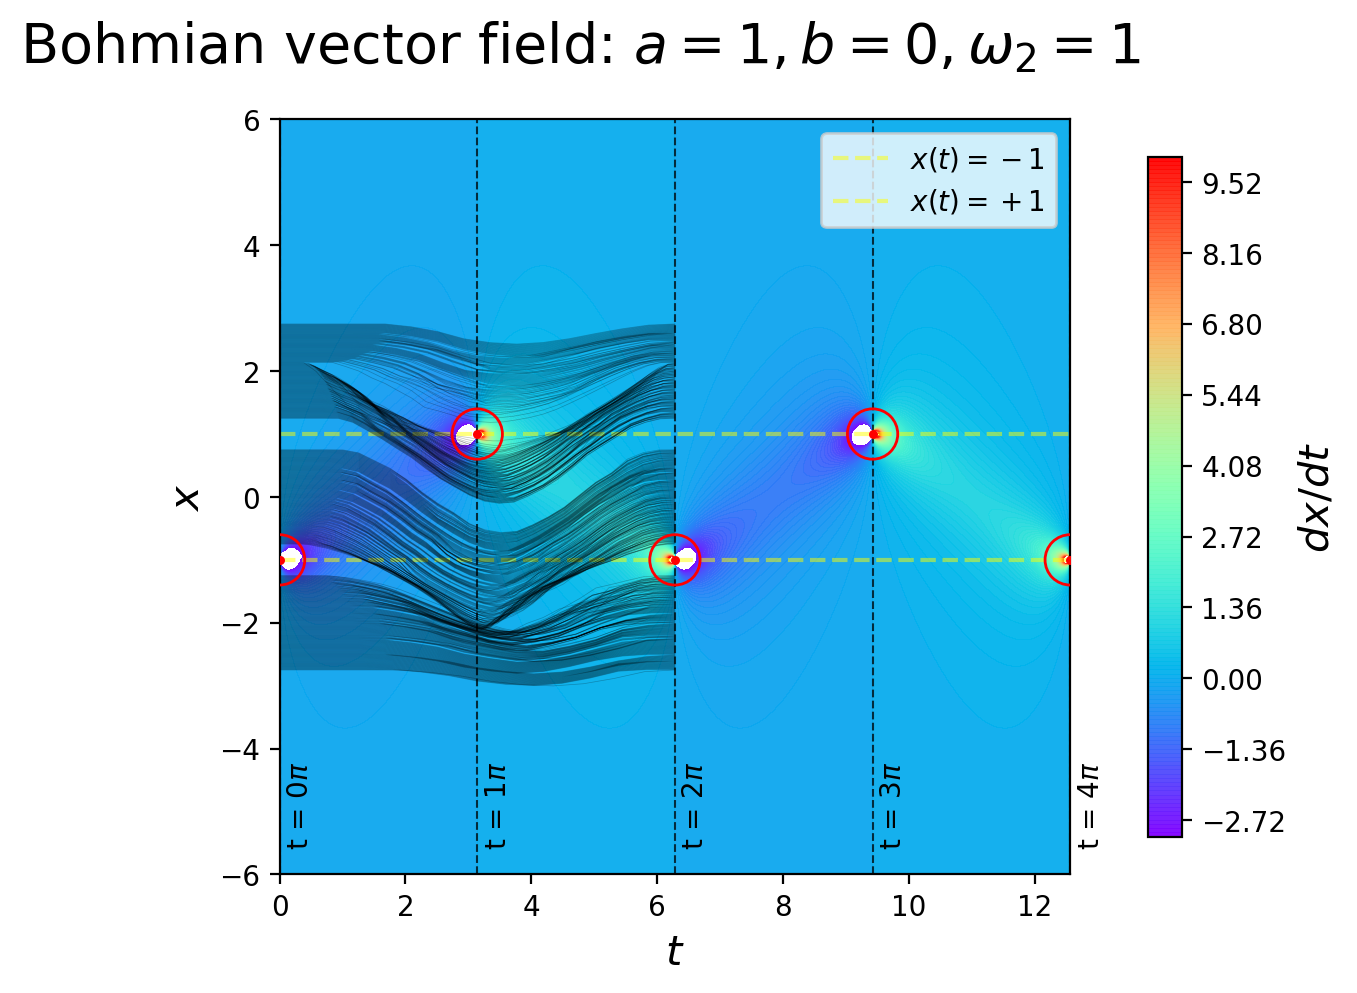

In [844]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines - nodal points
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
    
##############################################
#
# PLOT TRAJECTORIES (Forwards)
#
##############################################
t0, tf = [0, 2*np.pi]
time_span = (t0, tf)
color_traj = 'black'

N_traj = 200

ICs_interval = [1.25, 2.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

ICs_interval = [-0.75, 0.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
ICs_interval = [-2.75, -1.25]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

#### $t_0 = \pi/2 - \delta, t_f = \pi- \delta$

In [822]:
delta = 0.1
a, b, omega2, t0 = [1, 0, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

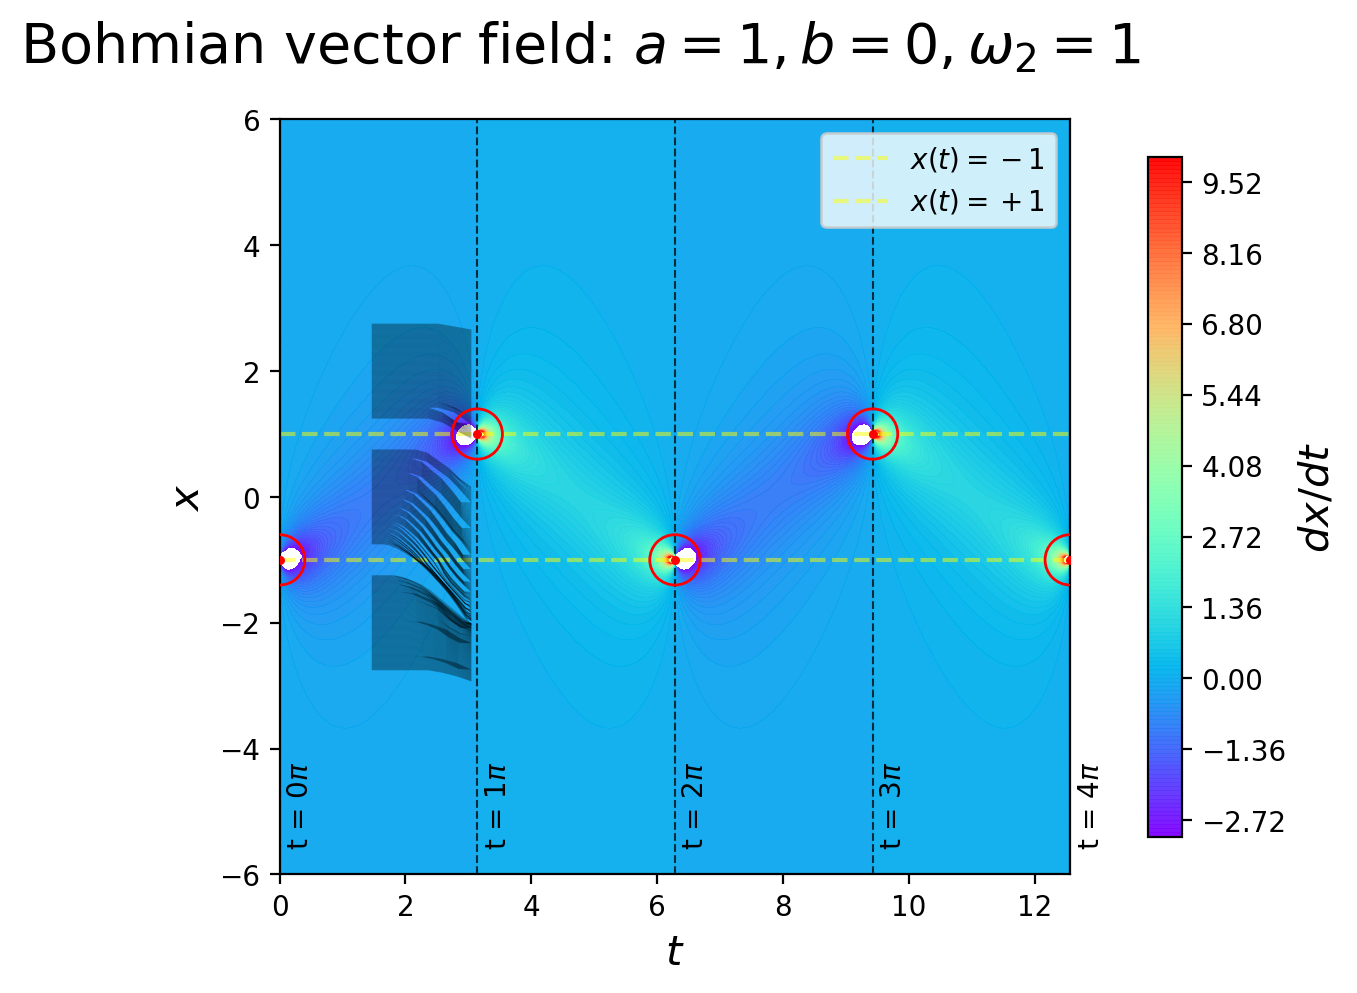

In [828]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# dashed lines - nodal points
xN_color = "yellow"
ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

##############################################
# plot nodal lines
colorN = "red"
for k in range(0, 5):
    tk = k*np.pi
    xN = -np.cos(tk)
    ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
    #circles surrounding nodal lines
    draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
    ax.add_artist(draw_circle)

##############################################
#vertical time lines
for k in range(5):
    ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
    ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
    
##############################################
#
# PLOT TRAJECTORIES (Forwards)
#
##############################################
t0, tf = [np.pi/2-delta, np.pi-delta]
time_span = (t0, tf)
color_traj = 'black'

N_traj = 200

ICs_interval = [1.25, 2.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

ICs_interval = [-0.75, 0.75]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
ICs_interval = [-2.75, -1.25]
# ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

for x in np.linspace(*ICs_interval, N_traj):
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
fig.suptitle(title, fontsize=20)

#axis labels
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)

#legends
ax.legend(loc="best")
##############################################

ax.set_aspect(1)
plt.show()

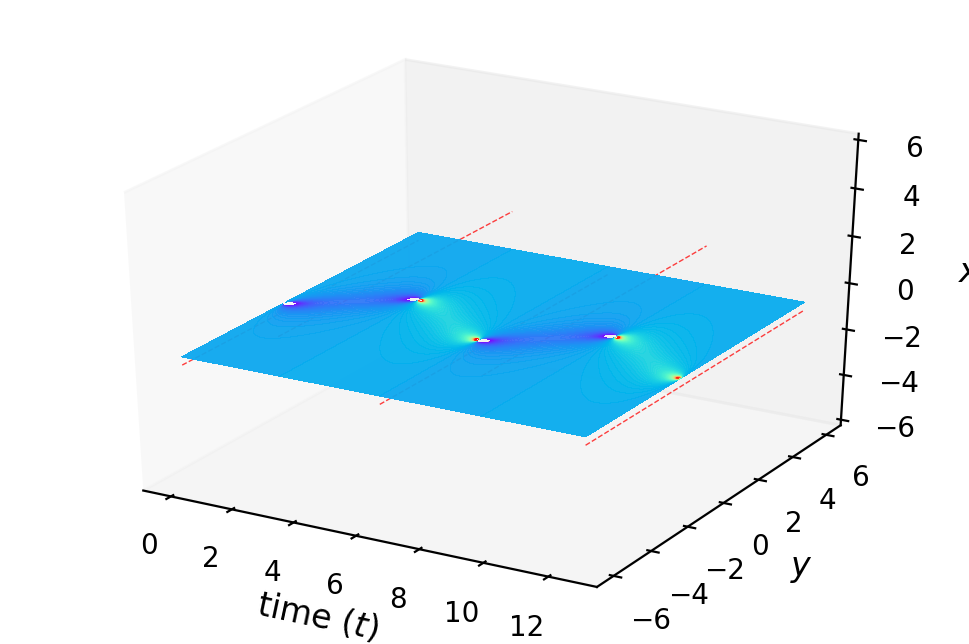

In [694]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

#plot nodal lines
colorN = "red"
for k in range(0, 5):
    y_min, y_max, Ny = [-6, 6, 300]
    tk = k*np.pi*np.ones(Ny)
    yN = np.linspace(y_min, y_max, Ny)
    xN = -np.cos(tk)
    rN = np.column_stack([xN, yN])
    ax.plot(tk, yN, xN, color=colorN,linestyle="--",lw=0.5,alpha=0.75)

contour1 = ax.contourf(T,X,vx,zdir='z',offset=-0.65,levels=n_levels,cmap=cmap, alpha=0.95)
# ax.contourf(points_ax1, points_ax2, LD,cmap='viridis',zdir='z', offset=-0.65,levels=200)
    
#axes labels
ax.set_xlabel("time ($t$)", fontsize=12) 
ax.set_ylabel("$y$", fontsize=12) 
ax.set_zlabel("$x$", fontsize=12) 
#axes limits
ax.set_zlim(-6,6)

ax.grid(False)

__Vector field__ Restricted

In [301]:
import numpy.ma as ma

In [492]:
x = np.linspace(x_min, x_max, 600)
t = np.linspace(0.0,np.pi/2, 300)

X,T = np.meshgrid(x,t)

In [493]:
#vector field
G = 1 + 2*x*np.cos(T) + X**2
vx = -np.sin(T)/G

vx = ma.masked_where(vx < -2, vx)
# vx = ma.masked_where(vx >  10, vx)

<IPython.core.display.Javascript object>


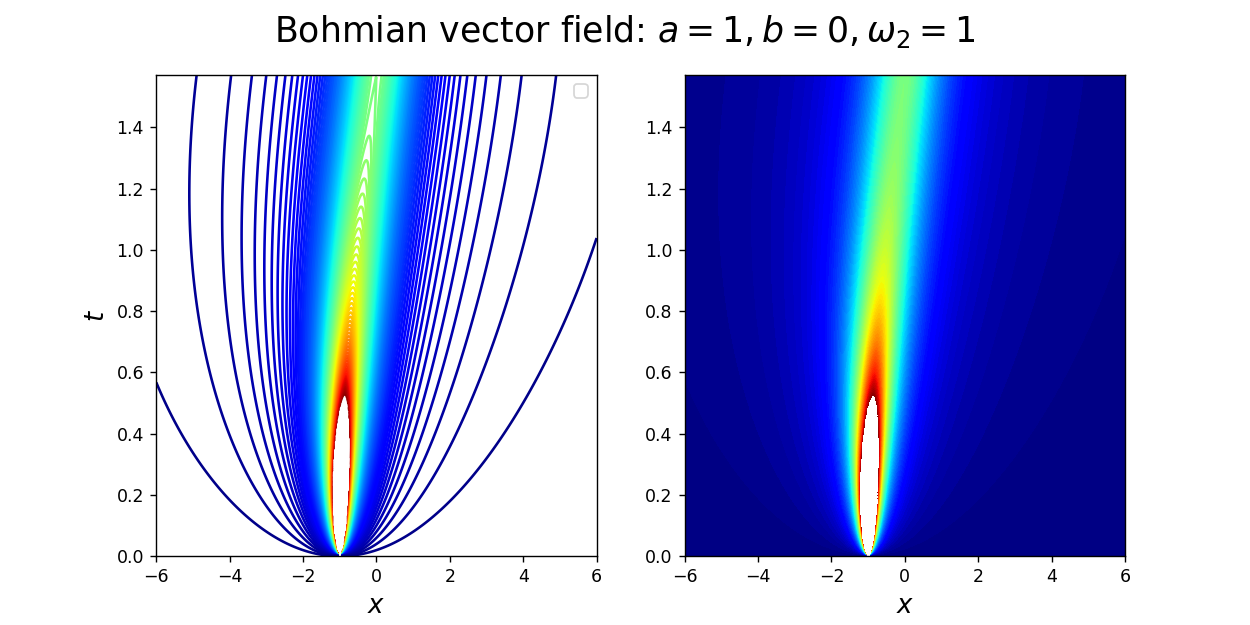

No handles with labels found to put in legend.


In [495]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

n_levels = 100
cmap = "jet_r"

##############################################
#CONTOUR LINES
ax[0].contour(X,T,vx,levels=n_levels,cmap=cmap)
# dashed lines - nodal points
# ax[0].plot((-1,-1),(0, 2*np.pi), color="black", label="$x_{nodal} = -1$", linestyle="--", lw=1, alpha=0.5)
# ax[0].plot((1,1),(0, 2*np.pi), color="black", label="$x_{nodal} = +1$", linestyle="--", lw=1, alpha=0.5)

##############################################
#CONTOUR PLOT
ax[1].contourf(X,T,vx,levels=n_levels,cmap=cmap)
# dashed lines - nodal points
# ax[1].plot((-1,-1),(0, 2*np.pi), color="black", linestyle="--", lw=1, alpha=0.5)
# ax[1].plot((1,1),(0, 2*np.pi), color="black", linestyle="--", lw=1, alpha=0.5)

##############################################
# Customise plot appearance
#title
fig.suptitle('Bohmian vector field: $a=1, b=0, \omega_2=1$', fontsize=20)
#axis labels
ax[0].set_xlabel("$x$", fontsize=15)
ax[1].set_xlabel("$x$", fontsize=15)
ax[0].set_ylabel("$t$", fontsize=15)
#legends
ax[0].legend(loc="best")

plt.show()

In [486]:
t = np.linspace(0,4*np.pi, 600)

<IPython.core.display.Javascript object>


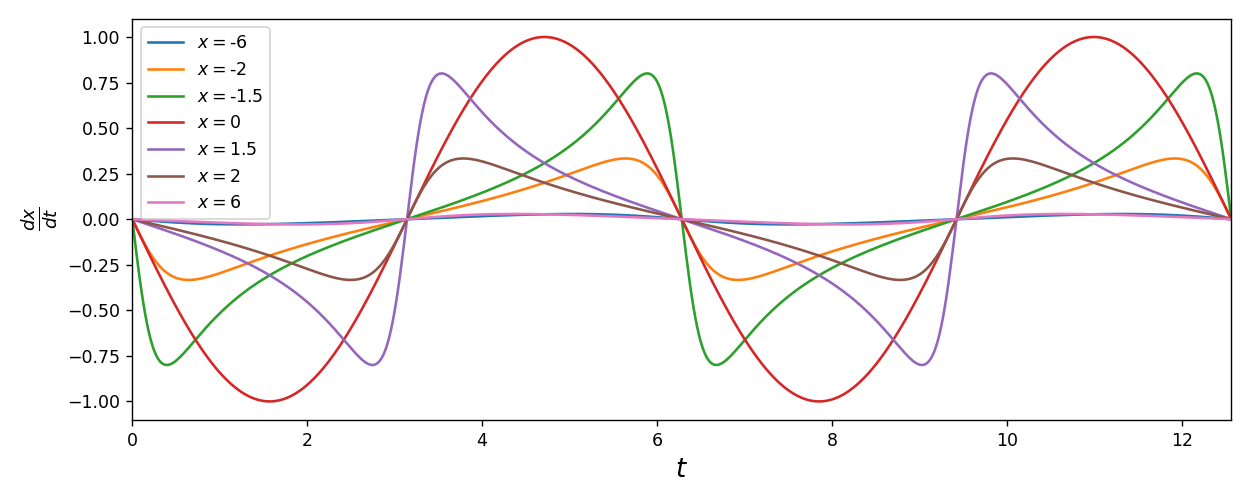

In [487]:
fig,ax = plt.subplots(1,1,figsize=(10,4))

for x in [-6,-2,-1.5,0,1.5,2,6]:
    #vector field
    G = 1 + 2*x*np.cos(t) + x**2
    vx = -np.sin(t)/G
    ax.plot(t, vx, label="$x = $"+str(x))

ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$\\frac{dx}{dt}$", fontsize=15)
ax.set_xlim(0, 4*np.pi)
ax.legend(loc="best")

fig.tight_layout()
plt.show()

### Lagrangian Descriptor

In [859]:
a, b, omega2, t0 = [1, 0, 1, np.pi/2]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

In [861]:
# Integration parameters
tau = np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [600, 600]

# Box boundaries for Variable Time Integration
# box_x_min, box_x_max = [-20, 20]

In [862]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [863]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

Text(0, 0.5, '$y$')

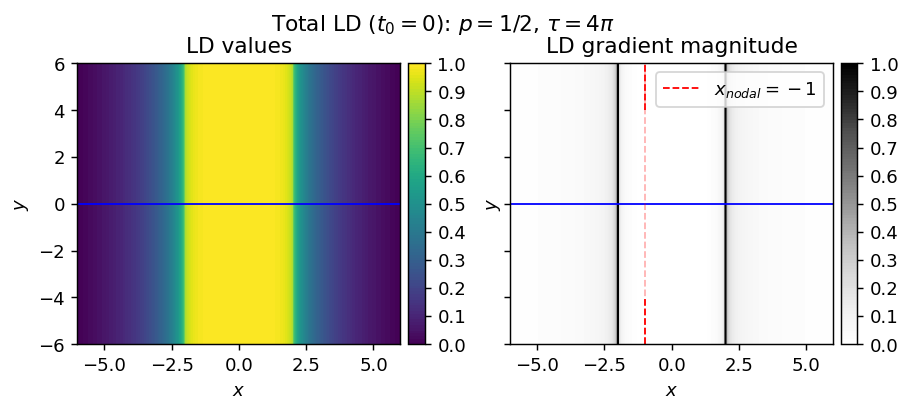

In [864]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

title = "Total LD ($t_0 = 0$): $p = 1/2$, $\\tau = 4\pi$"
fig,ax = draw_ld_pair(LD, LD_gradient, grid_parameters, title, interactive=False,cmap_gradient='Greys')
ax1, ax2 = ax

LD_segment_lw = 1
ax1.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)
ax2.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)

xN_lw = 1
colorN = "red"
ax2.plot((-1,-1),(4,6),color=colorN,linestyle="--", lw=xN_lw, alpha=1, label="$x_{nodal} = -1$")
ax2.plot((-1,-1),(-6,-4),color=colorN,linestyle="--", lw=xN_lw, alpha=1)
ax2.plot((-1,-1),(-6,6),color=colorN,linestyle="--", lw=xN_lw, alpha=0.3)

ax2.legend(loc="best")
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")

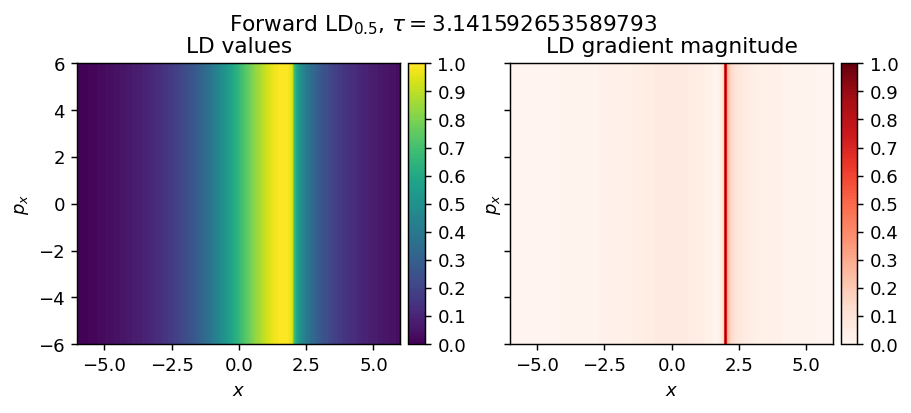

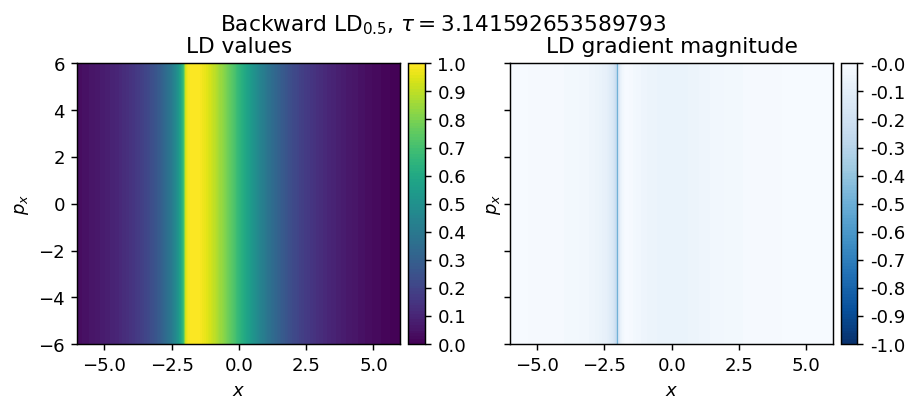

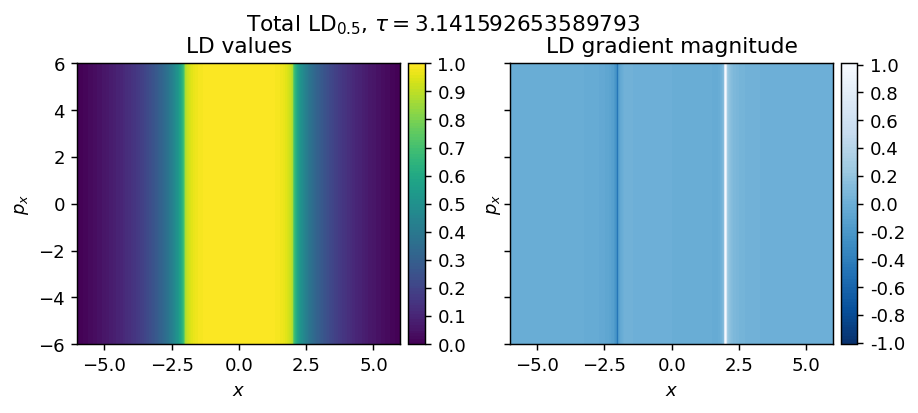

In [867]:
plots = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value, interactive=False)

### Lagrangian Descriptor slice

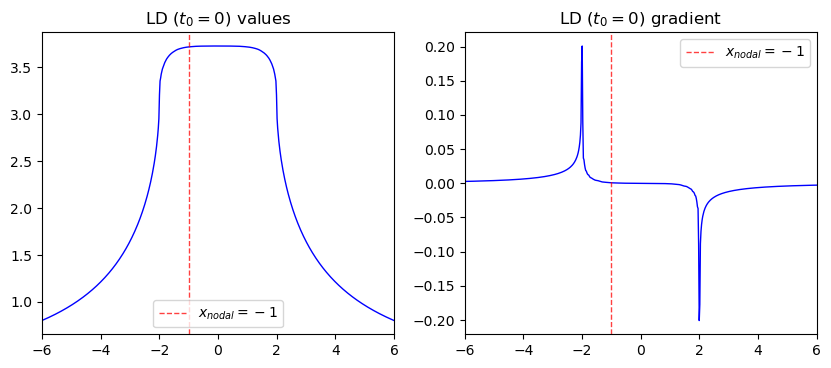

In [865]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=100)

x_axis = np.linspace(x_min, x_max, Nx)
LD_segment = LD.data[100]
LD_segment_gradient = np.gradient(LD_segment)

color = "blue"
lw =1

ax[0].plot(x_axis, LD_segment, color=color, lw=lw)
ax[0].set_xlim(-6,6)
ax[0].set_title("LD ($t_0 = 0$) values")

ax[1].plot(x_axis, LD_segment_gradient, color=color, lw=lw)
ax[1].set_xlim(-6,6)
ax[1].set_title("LD ($t_0 = 0$) gradient")

# dashed lines - nodal points
xN_color = "red"
xN_lw = 1
y0_lims = ax[0].get_ylim()
y1_lims = ax[1].get_ylim()
ax[0].plot((-1, -1), y0_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)
ax[1].plot((-1, -1), y1_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)

ax[0].set_ylim(*y0_lims)
ax[1].set_ylim(*y1_lims)

ax[0].legend(loc="best")
ax[1].legend(loc="best")

plt.show()

The nodal lines actually make a continuum along $y$

x_N = +1

In [521]:
a, b, omega2, t0 = [1, 0, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

In [522]:
# Integration parameters
# tau = np.pi/2
tau = 12

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [600, 600]

# Box boundaries for Variable Time Integration
# box_x_min, box_x_max = [-20, 20]

In [523]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [524]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


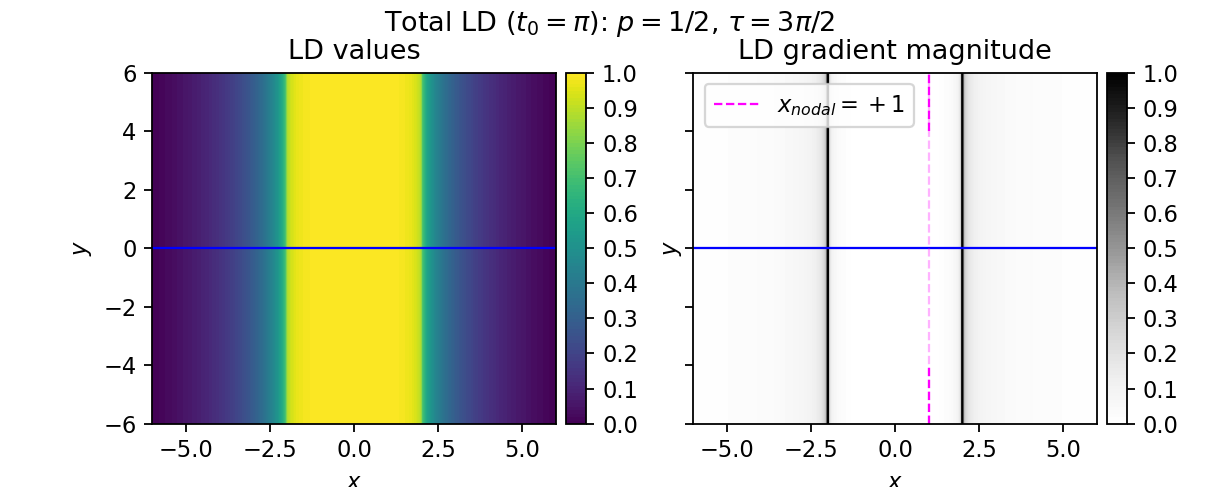

Text(0, 0.5, '$y$')

In [518]:
LD = LD_backward+LD_forward
LD_gradient = get_gradient_magnitude(LD)

title = "Total LD ($t_0 = \pi$): $p = 1/2$, $\\tau = 3\pi/2$"
fig,ax = draw_ld_pair(LD, LD_gradient, grid_parameters, title, interactive=False,cmap_gradient='Greys')
ax1, ax2 = ax

LD_segment_lw = 1
ax1.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)
ax2.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)

xN_lw = 1
ax2.plot((1,1),(4,6),color="magenta",linestyle="--", lw=xN_lw, alpha=1, label="$x_{nodal} = +1$")
ax2.plot((1,1),(-6,-4),color="magenta",linestyle="--", lw=xN_lw, alpha=1)
ax2.plot((1,1),(-6,6),color="magenta",linestyle="--", lw=xN_lw, alpha=0.3)

ax2.legend(loc="best")
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")

### Lagrangian Descriptor slice

<IPython.core.display.Javascript object>


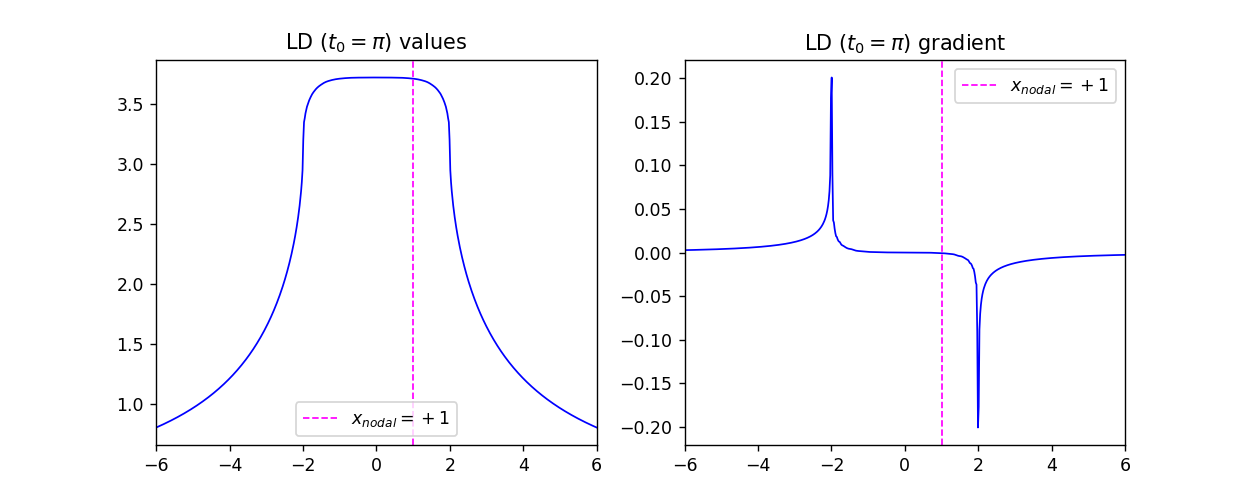

In [519]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=100)

x_axis = np.linspace(x_min, x_max, Nx)
LD_segment = LD.data[100]
LD_segment_gradient = np.gradient(LD_segment)

color = "blue"
lw =1

ax[0].plot(x_axis, LD_segment, color=color, lw=lw)
ax[0].set_xlim(-6,6)
ax[0].set_title("LD ($t_0 = \pi$) values")

ax[1].plot(x_axis, LD_segment_gradient, color=color, lw=lw)
ax[1].set_xlim(-6,6)
ax[1].set_title("LD ($t_0 = \pi$) gradient")

# dashed lines - nodal points
xN_color = "magenta"
xN_lw = 1
y0_lims = ax[0].get_ylim()
y1_lims = ax[1].get_ylim()
ax[0].plot((1, 1), y0_lims, color=xN_color, label="$x_{nodal} = +1$", linestyle="--", lw=xN_lw, alpha=1)
ax[1].plot((1, 1), y1_lims, color=xN_color, label="$x_{nodal} = +1$", linestyle="--", lw=xN_lw, alpha=1)

ax[0].set_ylim(*y0_lims)
ax[1].set_ylim(*y1_lims)

ax[0].legend(loc="best")
ax[1].legend(loc="best")

plt.show()

The nodal lines actually make a continuum along $y$

### Lagrangian Descriptor

x_N = -1

In [536]:
delta = 0.1
a, b, omega2, t0 = [1, 0, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

In [537]:
# Integration parameters
tau = 6*np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [600, 600]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-20, 20]

In [538]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [539]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

<IPython.core.display.Javascript object>


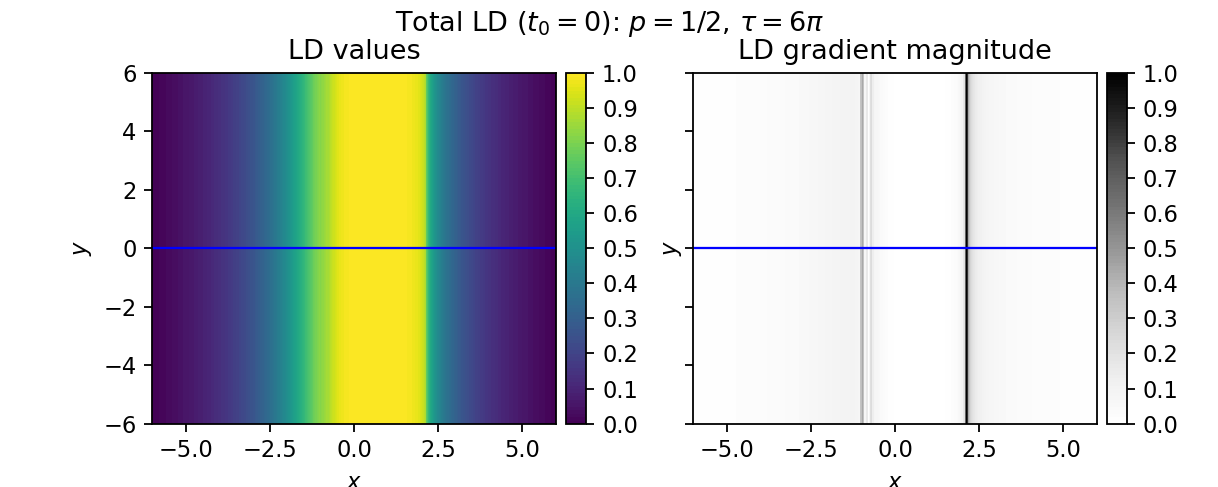

Text(0, 0.5, '$y$')

In [540]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

title = "Total LD ($t_0 = 0$): $p = 1/2$, $\\tau = 6 \pi$"
fig,ax = draw_ld_pair(LD, LD_gradient, grid_parameters, title, interactive=False,cmap_gradient='Greys')
ax1, ax2 = ax

LD_segment_lw = 1
ax1.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)
ax2.plot((-6,6),(0,0),color="blue", lw=LD_segment_lw, alpha=1)

# xN_lw = 1
# ax2.plot((-1,-1),(4,6),color="magenta",linestyle="--", lw=xN_lw, alpha=1, label="$x_{nodal} = -1$")
# ax2.plot((-1,-1),(-6,-4),color="magenta",linestyle="--", lw=xN_lw, alpha=1)
# ax2.plot((-1,-1),(-6,6),color="magenta",linestyle="--", lw=xN_lw, alpha=0.3)

# ax2.legend(loc="best")
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")

### Lagrangian Descriptor slice

<IPython.core.display.Javascript object>


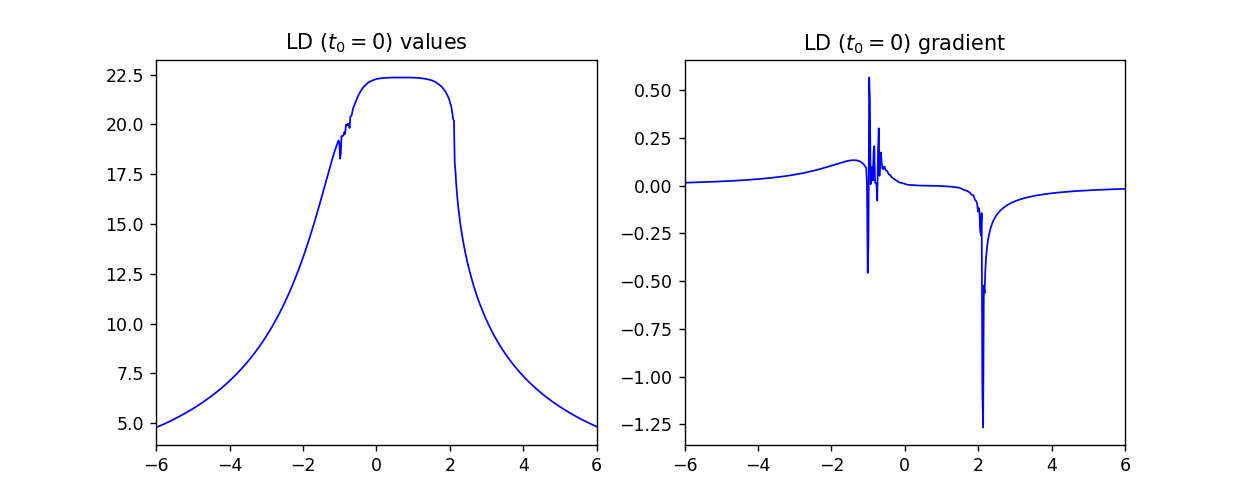

In [542]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=100)

x_axis = np.linspace(x_min, x_max, Nx)
LD_segment = LD.data[100]
LD_segment_gradient = np.gradient(LD_segment)

color = "blue"
lw =1

ax[0].plot(x_axis, LD_segment, color=color, lw=lw)
ax[0].set_xlim(-6,6)
ax[0].set_title("LD ($t_0 = 0$) values")

ax[1].plot(x_axis, LD_segment_gradient, color=color, lw=lw)
ax[1].set_xlim(-6,6)
ax[1].set_title("LD ($t_0 = 0$) gradient")

# dashed lines - nodal points
# xN_color = "magenta"
# xN_lw = 1
# y0_lims = ax[0].get_ylim()
# y1_lims = ax[1].get_ylim()
# ax[0].plot((-1, -1), y0_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)
# ax[1].plot((-1, -1), y1_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)

# ax[0].set_ylim(*y0_lims)
# ax[1].set_ylim(*y1_lims)

# ax[0].legend(loc="best")
# ax[1].legend(loc="best")

plt.show()

The nodal lines actually make a continuum along $y$

### Trajectories

In [546]:
%matplotlib inline

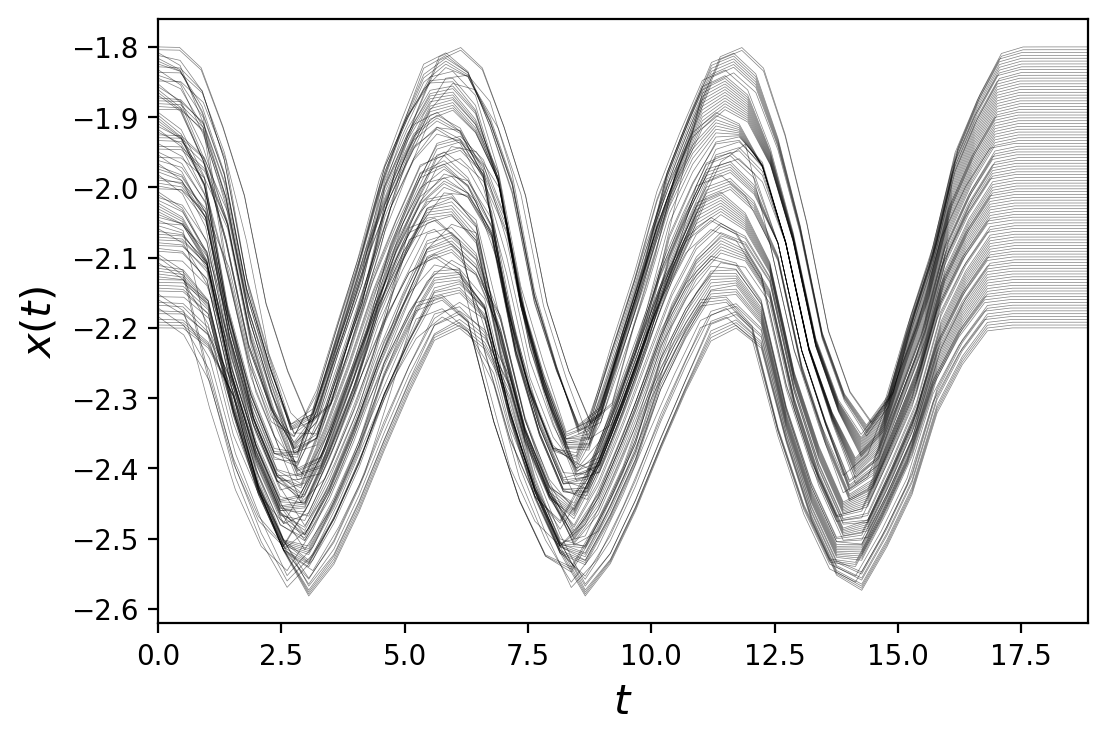

In [566]:
fig,ax = plt.subplots(1,1,dpi=200)
t0, tf = [0, 6*np.pi]; time_span = (tf, t0)
color_traj = 'black'

for x in np.linspace(-1.8, -2.2, 100):
# for x in np.linspace(1.8, 2.2, 100):    
    IC = np.array([x, 0])
    solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.5)

ax.set_xlim(0, 6*np.pi)
ax.set_xlabel("$t$", fontsize=15)
ax.set_ylabel("$x(t)$", fontsize=15)

plt.show()

## Case: $a, b, \omega_2 = (0, 1, 1)$

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{2}\psi_{1,1}
\end{equation*}

In [213]:
a, b, omega2 = [0, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [214]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [215]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

In [218]:
t0, tf, dt = [1, tau, 0.001]
nodal_point = Bohmian_nodal_point(np.arange(t0, tf, dt), PARAMETERS=[a, b, omega2])

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Text(0, 0.5, '$y$')

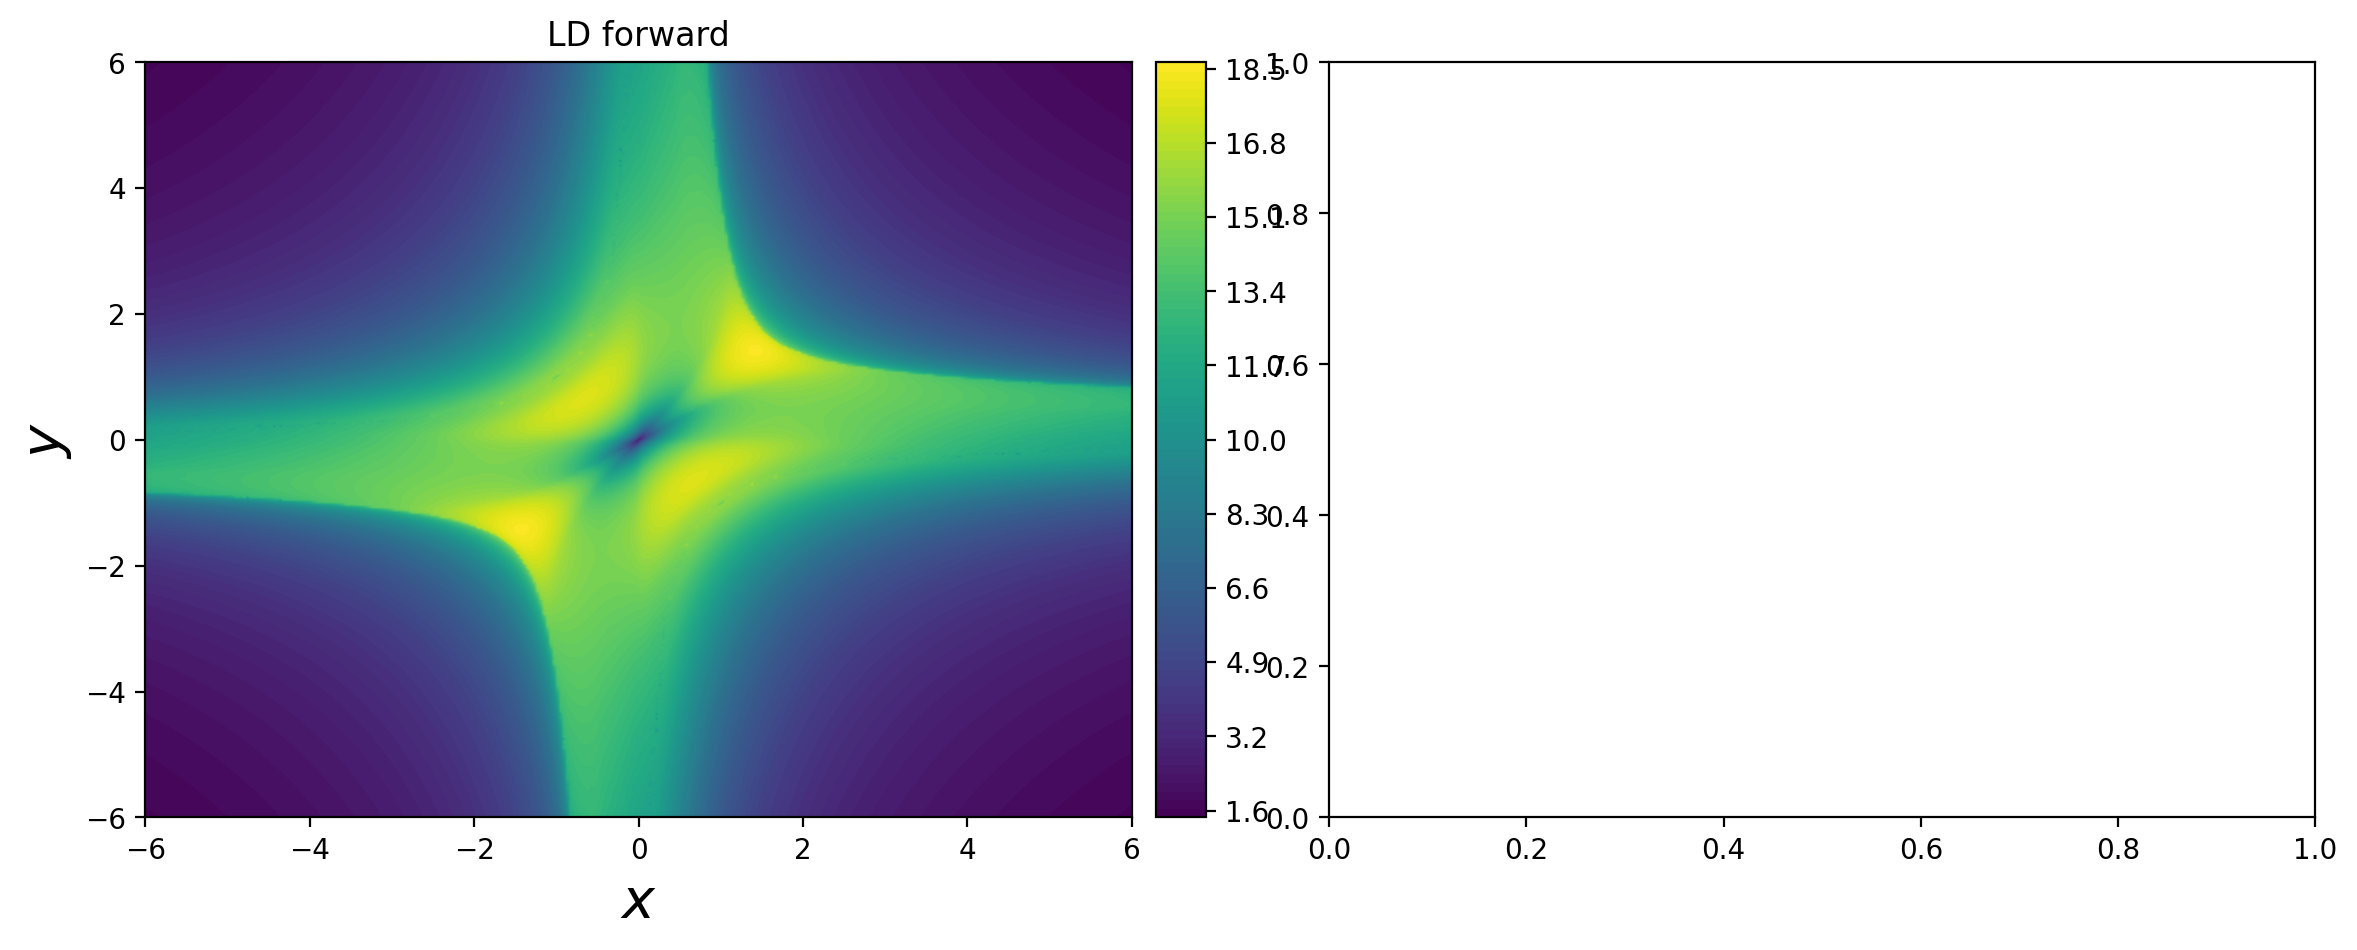

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), dpi=200)

LD = LD_forward
draw_ld(fig, ax[0], LD, grid_parameters, "LD forward", interactive=False, cmap='viridis')

# color_traj = 'magenta'
# ax[0].scatter(*trajectory, s=5, c=color_traj, zorder=10)
# ax[1].plot(np.linspace(*time_span,len(trajectory[0])) , trajectory[0], c=color_traj)

ax[0].set_xlabel("$x$", fontsize=20)
ax[0].set_ylabel("$y$", fontsize=20)

<span style="color:red">__TO-DO__</span> Do convergence assays for different values of $\tau = 0.1, 1, 3, 5, 8, 15$

## Case: $a, b, c = (1, 1, 1)$

In [238]:
a, b, omega2 = [1, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [239]:
# Integration parameters
tau = 10

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [100, 100]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [240]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = [(box_x_min, box_x_max)]

In [241]:
t0, tf, dt = [0.1, tau, 0.001]
nodal_point = Bohmian_nodal_point(np.arange(t0, tf, dt), PARAMETERS=[a, b, omega2])

In [242]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

In [243]:
LD = LD_forward + LD_backward
LD = normalise(LD)

<IPython.core.display.Javascript object>


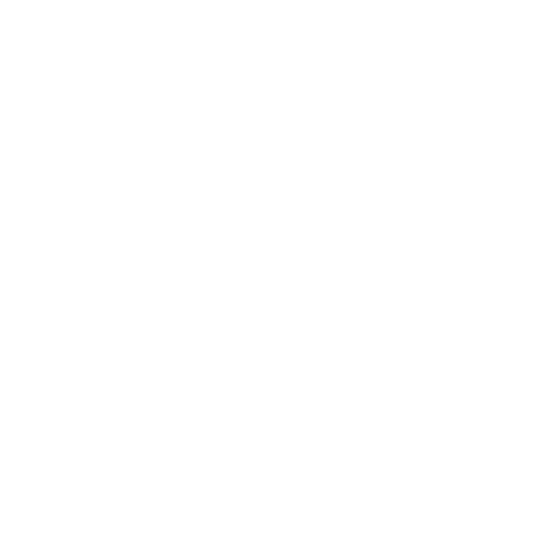

<IPython.core.display.Javascript object>


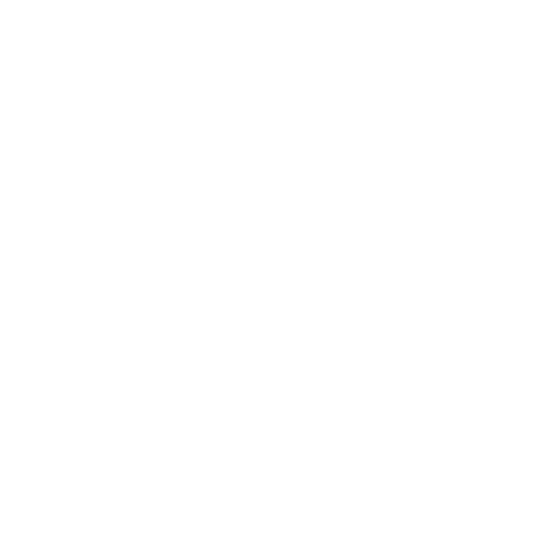

In [244]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

draw_ld(fig, ax, LD, grid_parameters, "Total LD", False, cmap='viridis')

## Simulations

SCRIPT

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise

def Bohmian_velocity_field(t, u, PARAMETERS=[1,1,1]):
    x, y = u.T
    #model parameters
    a, b, omega2 = PARAMETERS
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])
    
t0 = sys.argv[1] # initial time
tau = 20
    
a, b, omega2 = [1, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, (tau+t0), p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -(tau+t0), p_value, box_boundaries)

LD_forward.dump("simulations/LDf_test_.dat")
LD_backward.dump("simulations/LDb_test_.dat")


# Mixed dynamics

# APPENDIX

## Useful code blocks

Draw trajectories

In [309]:
# IC1 = np.array([-1.00001, 1])
IC1 = np.array([1.8, 1])
IC2 = np.array([2.2, 1])
# IC = np.array([3, 1])
# IC = np.array([1, 0])
t0, tf = [0, tau]; time_span = (t0, tf)
solution1 = solve_ivp(vector_field, time_span, IC1, rtol=1.0e-12)
solution2 = solve_ivp(vector_field, time_span, IC2, rtol=1.0e-12)
trajectory1 = solution1.y
trajectory2 = solution2.y

In [ ]:
color_traj1 = 'magenta'
ax[0].scatter(*trajectory1, s=5, c=color_traj1, zorder=10)
ax[1].plot(np.linspace(*time_span,len(trajectory1[0])) , trajectory1[0], c=color_traj1)

color_traj2 = 'blue'
ax[0].scatter(*trajectory2, s=5, c=color_traj2, zorder=10)
ax[1].plot(np.linspace(*time_span,len(trajectory2[0])) , trajectory2[0], c=color_traj2)